# Feature Engineering for Stock Data

In this notebook, we will apply feature engineering techniques to stock price data for the top 10 companies. We will calculate moving averages, exponential moving averages, and the Relative Strength Index (RSI) for each company.

First, we'll load the processed stock data for all companies, then apply the feature engineering steps.


In [16]:
import pandas as pd
import os
from datetime import datetime, timedelta

# Directory for processed data
processed_data_dir = '../data/processed'

# List of tickers
tickers = [
    "AAPL",  # Apple
    "MSFT",  # Microsoft
    "GOOGL", # Alphabet (Google)
    "AMZN",  # Amazon
    "TSLA",  # Tesla
    "BRK-B", # Berkshire Hathaway
    "NVDA",  # NVIDIA
    "META",  # Meta Platforms (Facebook)
    "V",     # Visa
    "JNJ"    # Johnson & Johnson
]

# Load the latest processed data for all tickers
def load_processed_data():
    yesterday = (datetime.now() - timedelta(1)).strftime('%Y-%m-%d')

    data_frames = []

    for ticker in tickers:
        processed_file = os.path.join(processed_data_dir, f"{ticker}_{yesterday}.csv")
        if os.path.exists(processed_file):
            df = pd.read_csv(processed_file)
            df['Ticker'] = ticker  # Add ticker column to identify the stock
            data_frames.append(df)
        else:
            print(f"No processed data found for {ticker} on {yesterday}")

    # Combine all DataFrames into one
    if data_frames:
        combined_df = pd.concat(data_frames, ignore_index=True)
        return combined_df
    else:
        print("No data loaded.")
        return None

# Load the data
df = load_processed_data()

# If data is loaded, continue with feature engineering


## Adding Moving Averages, EMA, and RSI for All Companies

Now we'll apply the feature engineering steps for each company in the dataset.


In [17]:
import numpy as np
def add_moving_average(df, window):
    """
    Adds a moving average (MA) column to the DataFrame.
  
    Args:
        df (pd.DataFrame): DataFrame containing the stock data.
        window (int): Window size for the moving average.
  
    Returns:
        df (pd.DataFrame): DataFrame with added moving average column.
    """
    df[f"MA_{window}"] = df['Close'].rolling(window=window).mean()
    return df

def add_exponential_moving_average(df, span):
    """
    Adds an exponential moving average (EMA) column to the DataFrame.
  
    Args:
        df (pd.DataFrame): DataFrame containing the stock data.
        span (int): Span for the EMA.
  
    Returns:
        df (pd.DataFrame): DataFrame with added EMA column.
    """
    df[f"EMA_{span}"] = df['Close'].ewm(span=span, adjust=False).mean()
    return df

def add_rsi(df, window=14):
    """
    Adds Relative Strength Index (RSI) column to the DataFrame.
  
    Args:
        df (pd.DataFrame): DataFrame containing the stock data.
        window (int): Window size for calculating RSI (default is 14).
  
    Returns:
        df (pd.DataFrame): DataFrame with added RSI column.
    """
    delta = df['Close'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=window).mean()

    avg_loss = pd.Series(loss).rolling(window=window).mean()

    rs = avg_gain / avg_loss
    df[f"RSI_{window}"] = 100 - (100 / (1 + rs))

    return df


## Visualization

Now we'll plot the data, including the original 'Close' prices, moving averages, exponential moving averages, and RSI for all companies.


                          Date        Open        High         Low  \
199  2020-10-15 00:00:00-04:00  116.018504  118.442067  115.461474   
200  2020-10-16 00:00:00-04:00  118.520236  118.784096  116.106440   
201  2020-10-19 00:00:00-04:00  117.230281  117.679813  113.028133   
202  2020-10-20 00:00:00-04:00  113.555841  116.272588  112.998812   
203  2020-10-21 00:00:00-04:00  114.015156  116.008736  113.800161   

          Close     Volume  Dividends  Stock Splits       MA_50     MA_200  \
199  117.963219  112559200        0.0           0.0  114.258390  86.365849   
200  116.311661  115393800        0.0           0.0  114.362417  86.583027   
201  113.340851  120639300        0.0           0.0  114.457552  86.788893   
202  114.836037  124423700        0.0           0.0  114.551025  86.999360   
203  114.210609   89946000        0.0           0.0  114.697514  87.208411   

    Ticker       MA_20      EMA_20     RSI_14  
199   AAPL  112.143732  114.253442  63.102257  
200   AAPL  11

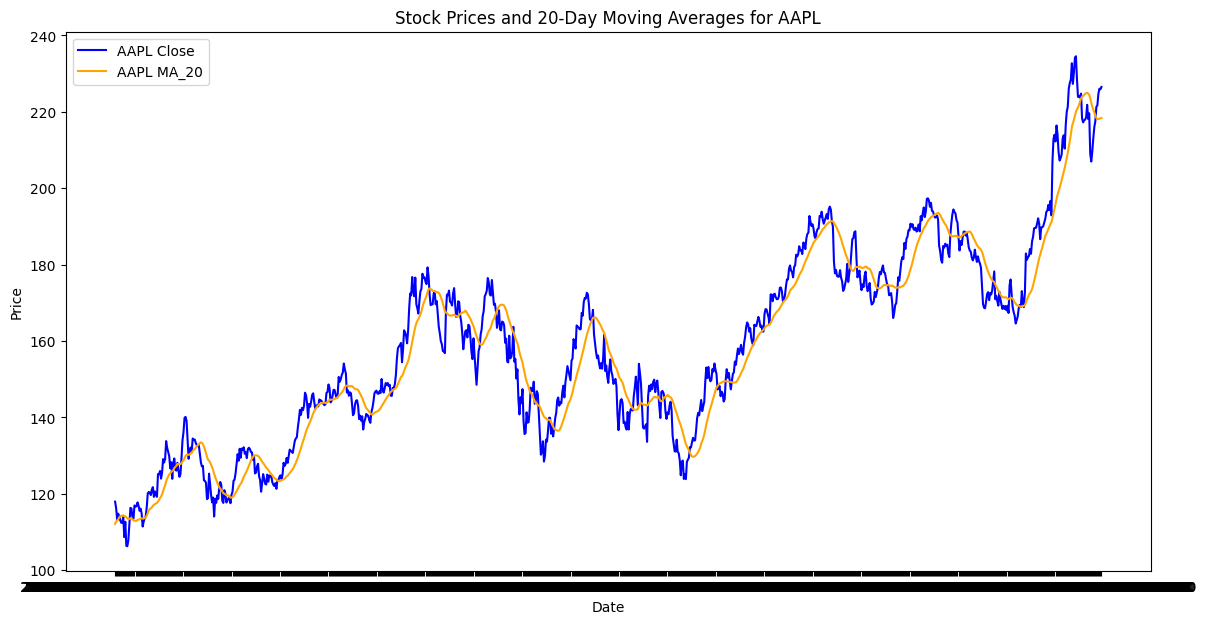

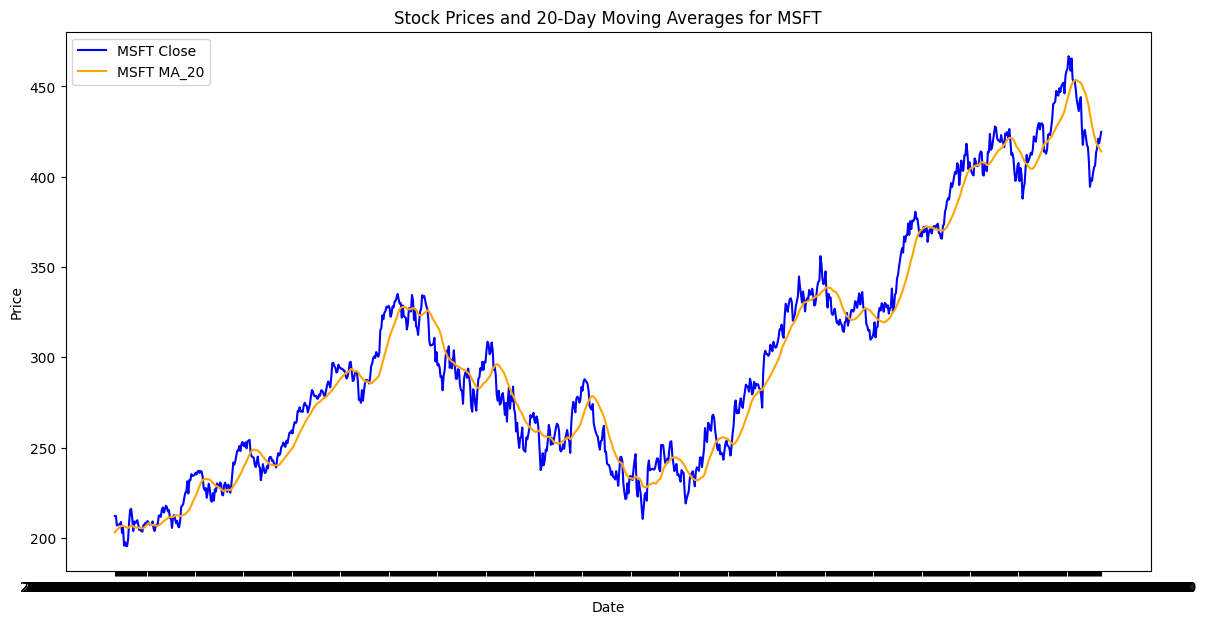

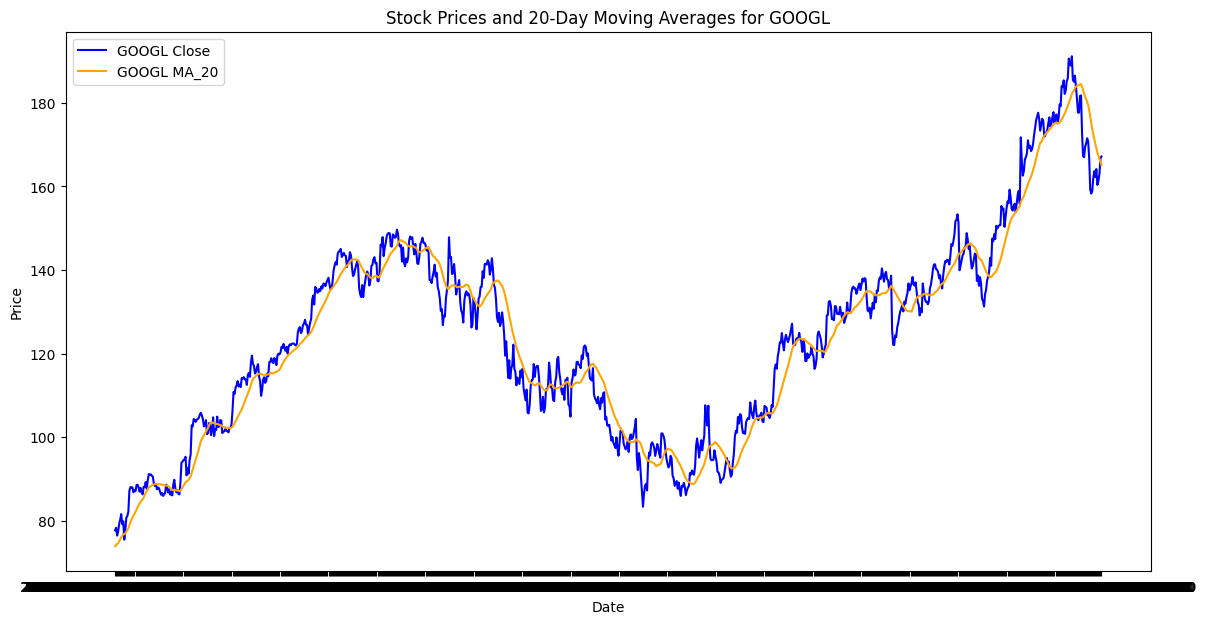

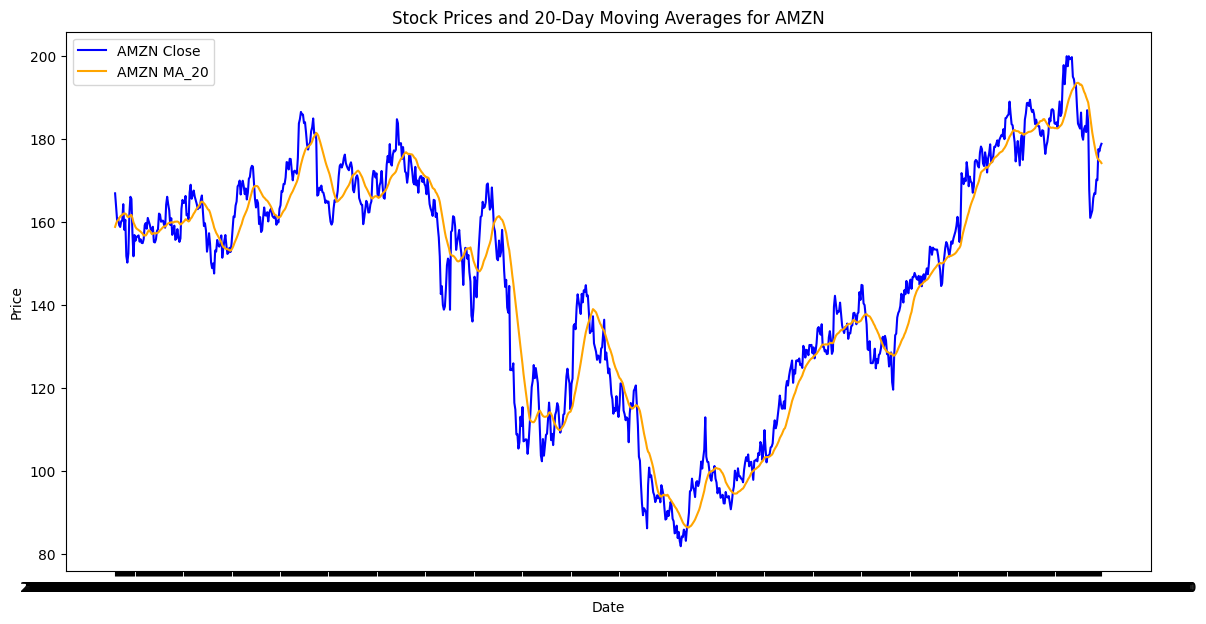

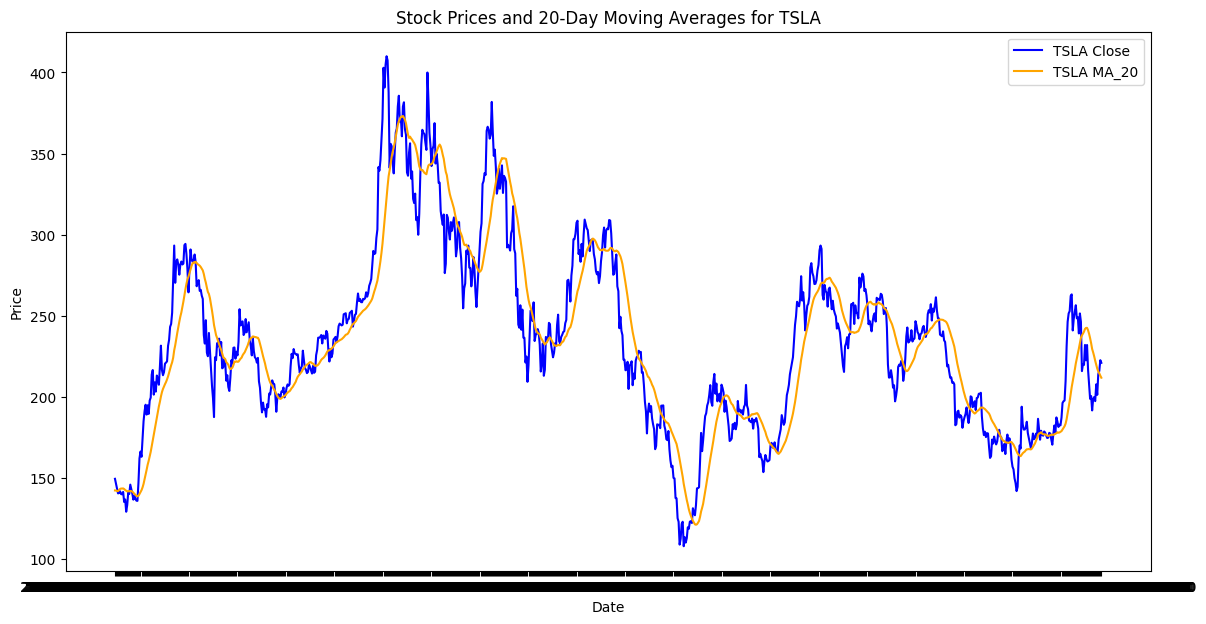

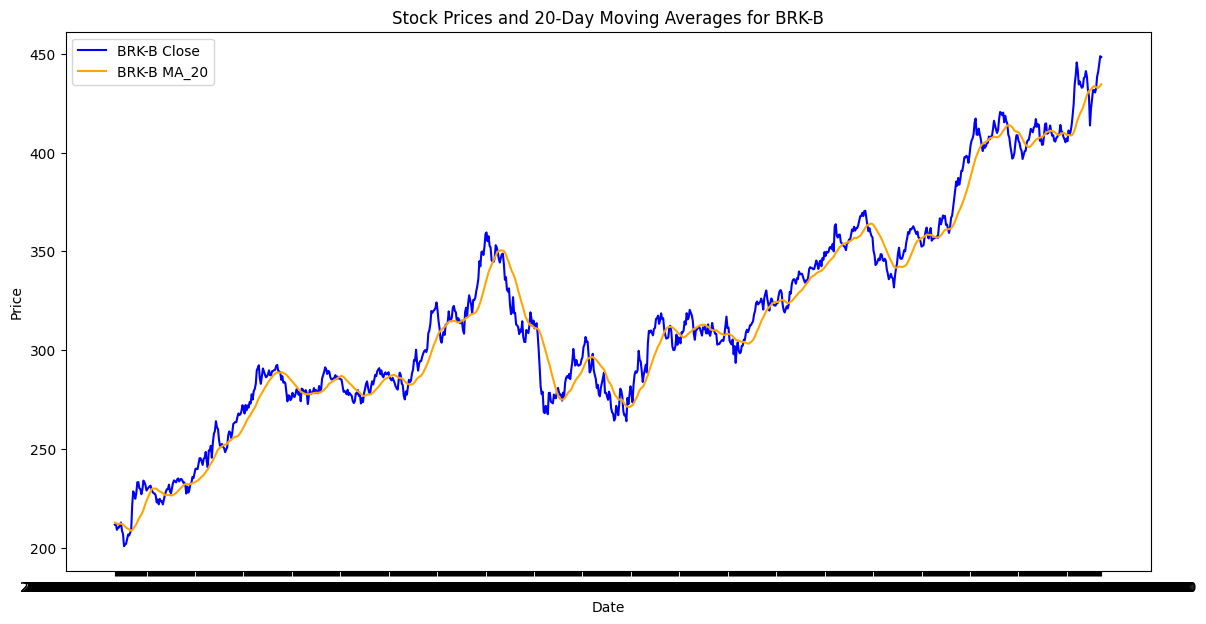

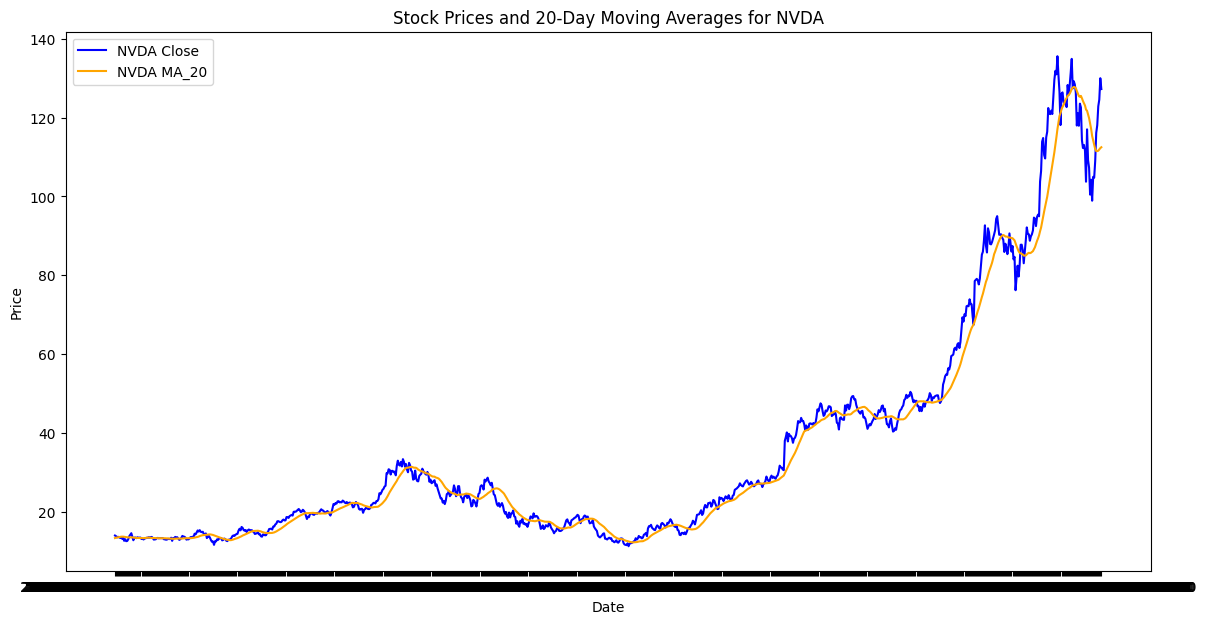

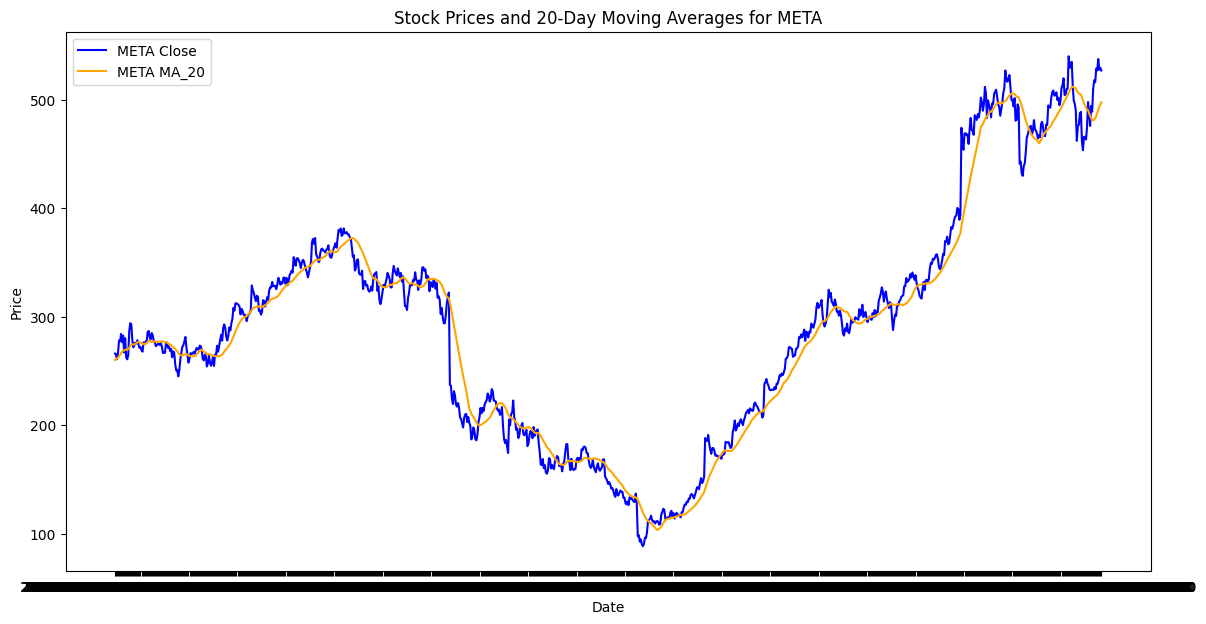

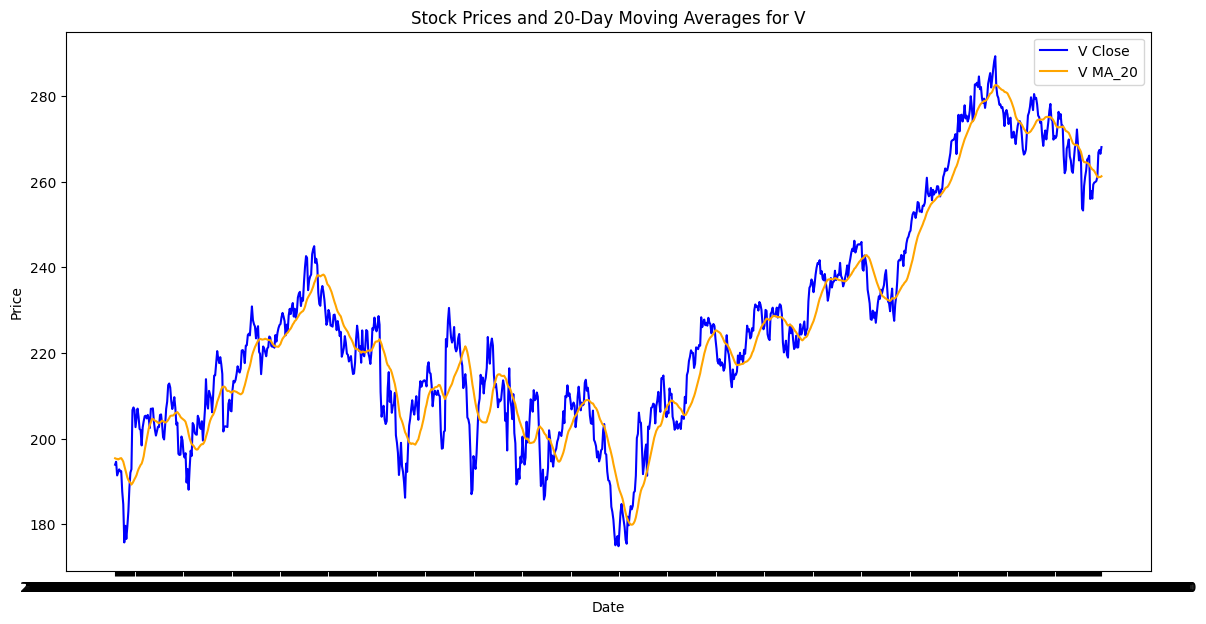

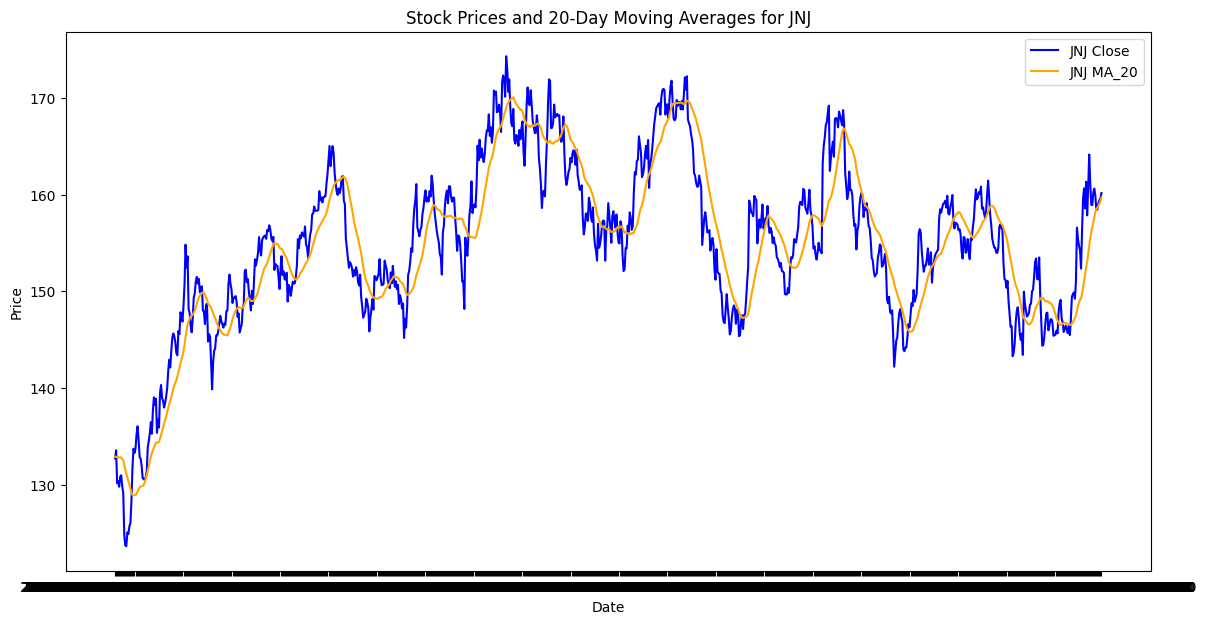

In [18]:
import matplotlib.pyplot as plt

# Load the data
combined_df = load_processed_data()

# If data is loaded, apply feature engineering
if combined_df is not None:
    # Apply moving average, EMA, and RSI calculations
    combined_df = add_moving_average(combined_df, window=20)
    combined_df = add_exponential_moving_average(combined_df, span=20)
    combined_df = add_rsi(combined_df, window=14)

    # Drop NaN values introduced by rolling calculations
    combined_df.dropna(inplace=True)

    # Display the first few rows of the feature-engineered DataFrame
    print(combined_df.head())

    # Plotting the closing prices and moving averages for each ticker
    for ticker in tickers:
        ticker_df = combined_df[combined_df['Ticker'] == ticker]

        plt.figure(figsize=(14, 7))
        plt.plot(ticker_df['Date'], ticker_df['Close'], label=f'{ticker} Close', color='blue')
        plt.plot(ticker_df['Date'], ticker_df['MA_20'], label=f'{ticker} MA_20', color='orange')

        plt.title(f"Stock Prices and 20-Day Moving Averages for {ticker}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()
